# Exercises: Clustering: Wrangle - EXERCISES
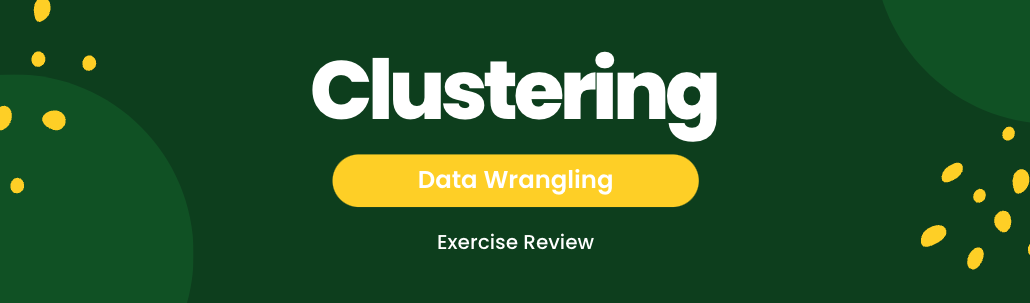

<hr style="border:2px solid gray">

In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import wrangle as w

# Part I: Zillow

## Acquire and Summarize

### #1. Acquire data from the cloud database.

You will want to end with a single dataframe. **Include the logerror field and all other fields related to the properties that are available**. 
- *You will end up using all the tables in the database.*

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. 
   - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) 
   - Only include properties that have a latitude and longitude value.

In [ ]:
#URL function
def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [ ]:
#use our function inside env to create the url
url = w.get_connection_url('zillow')

#Create the SQL query
query = '''
        SELECT prop.* ,
            pred.logerror,
            pred.transactiondate,
            air.airconditioningdesc,
            arch.architecturalstyledesc,
            build.buildingclassdesc,
            heat.heatingorsystemdesc,
            land.propertylandusedesc,
            story.storydesc,
            type.typeconstructiondesc
        from properties_2017 prop
        JOIN ( -- used to filter all properties with their last transaction date in 2017, w/o dups
                SELECT parcelid, MAX(transactiondate) AS max_transactiondate
                FROM predictions_2017
                GROUP BY parcelid) trans using (parcelid)
        -- bringing in logerror & transaction_date cols
        JOIN predictions_2017 pred ON trans.parcelid = pred.parcelid
                          AND trans.max_transactiondate = pred.transactiondate
        -- bringing in all other fields related to the properties
        LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
        LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
        LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
        LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
        LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
        LEFT JOIN storytype story USING(storytypeid)
        LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
        -- exercise stipulations
        WHERE propertylandusedesc = "Single Family Residential"
            AND transactiondate <= '2017-12-31'
            AND prop.longitude IS NOT NULL
            AND prop.latitude IS NOT NULL;
        '''

In [ ]:
#create the dataframe using the sql query and our url
df = pd.read_sql(query, url)

In [ ]:
#take a look
df.head(3)

<hr style="border:1px solid black">

### #2. Summarize your data

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().T

In [ ]:
df.shape

In [ ]:
w.summarize(df, 'id')

<hr style="border:1px solid black">

### #3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name 
- The first column is the **number of rows** with *missing values* for that attribute
- The second column is **percent of total rows** that have *missing values* for that attribute. 
- Run the function and document takeaways from this on how you want to handle missing values.

In [ ]:
def nulls_by_col(df):
    """
    This function will:
        - take in a dataframe
        - assign a variable to a Series of total row nulls for ea/column
        - assign a variable to find the percent of rows w/nulls
        - output a df of the two variables.
    """


In [ ]:
nulls_by_col(df).sort_values(by='percent_rows_missing', ascending=False)

<div class="alert alert-block alert-success">
<b>Takeaways:</b>
    <br>
    <br>

</div>

<hr style="border:1px solid black">
<hr style="border:1px solid black">

## Prepare

### #1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). 
- There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.
- ```propertylandusetypeid``` already tells us they are single unit properties <b>but</b> what if we didn't have this feature?? 

In [ ]:
df.propertylandusetypeid.value_counts()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>
    
There are many ways to determine this.

</div>

In [ ]:
#Maybe there are some houses with no square footage?



In [ ]:
#What about nonexistent lots?



In [ ]:
#Maybe ones that have no bedrooms?



In [ ]:
#Maybe ones that have no bathrooms?



<div class="alert alert-block alert-success">
<b>Takeaways:</b>

</div>

### #2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [ ]:
def drop_based_on_pct(df, pc = 0.5, pr = 0.75):
    """
    drop_based_on_pct takes in: 
    - dataframe
    - threshold percent of non-null values for columns(# between 0-1)
        - defaulted at half/.5
    - threshold percent of non-null values for rows(# between 0-1)
        - defaulted at three-quarters/.75
    Returns: a dataframe with the columns and rows dropped as indicated.
    """
    


In [ ]:
clean_df = drop_based_on_pct(df, .75, .75)

In [ ]:
#Let's use our function


#take a look



In [ ]:
#use our function to see how many nulls we have left
null_clean = null_counter(clean_df)

#take a look at top 10 null columns
null_clean.sort_values(by='pct_rows_missing', ascending=False).head(10)

In [ ]:
clean_df.shape

<div class="alert alert-block alert-success">
<b>Takeaways:</b>
    <br>
    <br>   
The "clean" dataframe contains:
<br>
    
- 29 columns instead of 68 columns
<br>
- At the most, we have a column with 2% nulls instead of 100% nulls
<br>
- The dataframe shape changed from (52319, 68) to (52317, 29)
</div>

### #3. Encapsulate your work inside of functions in a wrangle_zillow.py module.

<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

# Part II: Mall Customers

### #1. Acquire data from the customers table in the mall_customers database.

In [ ]:
#use our function inside env to create the url
mall_url = w.get_connection_url('mall_customers')

#Create the SQL query
mall_query = '''
             SELECT *
             FROM customers
             '''

In [ ]:
#Read in the dataset
mall_df = pd.read_sql(mall_query, mall_url)

In [ ]:
mall_df.head()

### #2. Summarize the data (include distributions and descriptive statistics).

In [ ]:
w.summarize(mall_df, 'customer_id')

In [ ]:
mall_df.describe().T

In [ ]:
mall_df.info()

### #3. Detect outliers using IQR.

<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>

<b>Quartiles</b>
<br>
- data is split into 4 equal parts
<br>
- a quartile represents one of these bins that captures exactly 25% of the data 
<br>
- 25% / 25% / 25% / 25%
<br>
    
<b>Bounds/IQR</b>    
- lower bound: Q1-(k*IQR)
<br>
- upper bound: Q3+(k*IQR)
    

</div>

In [ ]:
#let's find our quantiles for age
mall_df['age'].quantile([0.25,0.75])

In [ ]:
#another way to do this, numpy percentile function
q1, q3= np.percentile(mall_df['age'], [25, 75])
q1, q3

In [ ]:
#yet another way to do this, numpy quantile function
q1, q3 = np.quantile(mall_df['age'], [0.25, 0.75])
q1, q3

In [ ]:
def outlier(df, feature, m=1.5):
    '''
    outlier will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    '''
    q1, q3 = df[feature].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + (m * iqr)
    lower_bound = q1 - (m * iqr)
    
    print(f'For {feature}, the lower bound is {lower_bound} and  upper bound is {upper_bound}')
    
    return upper_bound, lower_bound


In [ ]:
ageUP, ageLOW = outlier(mall_df, 'age')

In [ ]:
ageUP, ageLOW

In [ ]:
#identify numeric columns only
num_df = mall_df.select_dtypes(exclude=object)
num_df.info()

In [ ]:
##identify discrete columns only
disc_df = mall_df.select_dtypes(include=object)
disc_df.info()

In [ ]:
#let's iterate through the list of numeric columns 
##to find the upper and lower bounds
cols = num_df.columns.to_list()    

for col in cols:
    outlier_bound_calculation(num_df, [col])

### #4. Split data into train, validate, and test.

In [ ]:
#function from wrangle.py
def split_data(df, target):
    '''
    This function take in a dataframe performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test
    and prints out the shape of train, validate, test
    '''
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    #Split into X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_data(mall_df, 'spending_score')

### #5. Encode categorical columns using a one hot encoder (pd.get_dummies).

<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>
    
- The only column in this data that needs to be encoded is gender.

</div>

In [ ]:
#Check get_dummies works as expected on my training data
dummy_df = pd.get_dummies(train)
dummy_df

In [ ]:
def encoding(df, cols, drop_first=True):
    '''
    Take in df and list of columns
    add encoded columns derived from columns in list to the df
    '''
    for col in cols:

        dummies = pd.get_dummies(df[f'{col}'], drop_first=drop_first) # get dummy columns

        df = pd.concat([df, dummies], axis=1) # add dummy columns to df
        
    return df

In [ ]:
train_encoded = encoding(train, disc_df , drop_first=True)

In [ ]:
train_encoded

### #6. Handles missing values.

In [ ]:
#count of nulls in the df
mall_df.isnull().sum()

In [ ]:
#use null value counter function
null_malldf = null_counter(mall_df)

#take a look
null_malldf.sort_values(by='pct_rows_missing', ascending=False)

### #7.Scaling

In [ ]:
train_encoded.info()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>

Only numeric columns typically need to be scaled.
<br>
- customer_id does not need to be scaled
<br>
- gender does not need to be scaled
<br>
- Male does not need to be scaled
<br>
- spending_score is our target so it also does not need to be scaled
</div>

In [ ]:
#create the scaler
mms = MinMaxScaler()

#fit the scaler on the desired columns
train_encoded[['age', 'annual_income']] = mms.fit_transform(train_encoded[['age','annual_income']])

#take a look
train_encoded.head()

<div class="alert alert-block alert-success">
<b>Takeaways:</b>
<br>
- We now have gender encoded (dummy variable)
<br>
- Age and annual income are scaled
</div>